In [3]:
#!/usr/bin/env python
"""
--------------------------------------------------------------------------
Created December 10, 2022 for TRIPs-Py library
"""
__authors__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha and Connor Sanderford"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com and csanderf@asu.edu; connorsanderford@gmail.com"

#### Import the methods and functions needed

In [4]:
from trips.solvers.tSVD import *
from trips.testProblems import Deblurring
import matplotlib.pyplot as plt
from trips.helpers import *

Step 1: Generate a small deblurring example

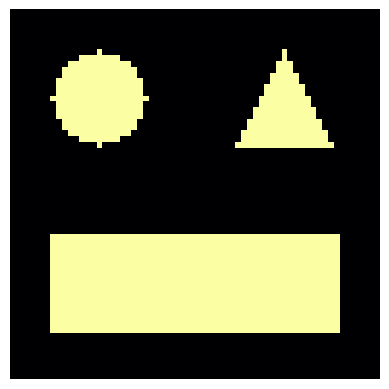

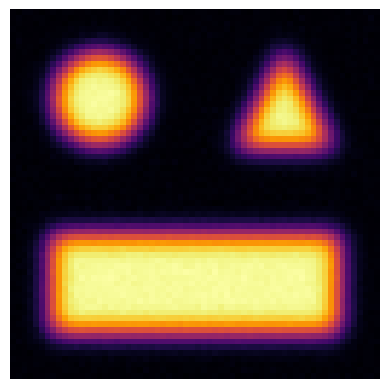

<Figure size 640x480 with 0 Axes>

In [5]:
# Deblurring example test problem
Deblur = Deblurring()
# In the class Deblurring we have can define the type of problem to be used.
generate_matrix = True #Defines a blurring operator where the forward operator matrix is formed explicitly
imagesize_x = 64 # Define the first dimension of the image
imagesize_y = 64 # Defines the second dimension of the image
spread = 2 # The PSF parameter
choose_image = 'pattern1' #The choice of the image
if generate_matrix == True:
        size = imagesize_x
        shape = (size, size)
        spreadnew = (spread, spread)
        A = Deblur.forward_Op_matrix(spreadnew, shape, imagesize_x, imagesize_y)
(x_true, nx, ny) = Deblur.generate_true(choose_image)
b_true = Deblur.generate_data(x_true, generate_matrix)
(b, delta) = Deblur.add_noise(b_true, 'Gaussian', noise_level = 0.01)
Deblur.plot_rec(x_true.reshape((shape), order = 'F'), save_imgs = False, save_path='./saveImagesDeblurring'+'rec'+choose_image)
Deblur.plot_data(b.reshape((shape), order = 'F'), save_imgs = False, save_path='./saveImagesDeblurring'+'data'+choose_image)

##### Compute the SVD of the operartor $A$ and plot the singlar values and the singular vectors
###### If the parameter is 'A' then we give the full operator to the function plot_singular_values_svd. The SVD is then computed and the singlar values are plotted. If the parameter is 'S' then we have precomputed the SVD from which we have S and the function plot_singular_values_svd will only plot the singular values. The same applies for plotting the singular vectors. If the operaror is not given, we give the matrix V.

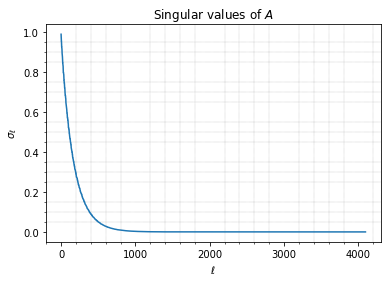

In [11]:
plot_singular_values_svd(Operator = A, parameter = 'A')

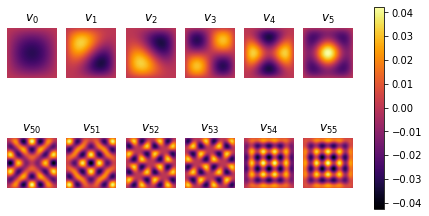

In [10]:
plot_singular_vectors_svd(Operator = A, size = imagesize_x, parameter = 'A')

#### Compute the truncated SVD solution of a problem by specifying how many singular values you want to keep after truncation

(-0.5, 63.5, 63.5, -0.5)

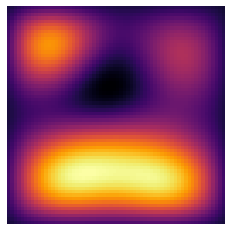

In [5]:
truncated_value = 15
b_vec = b.reshape((-1,1))
x_tsvd = TruncatedSVD_sol(A, truncated_value, b_vec)
plt.imshow(x_tsvd.reshape((imagesize_x, imagesize_y)))
plt.axis('off')

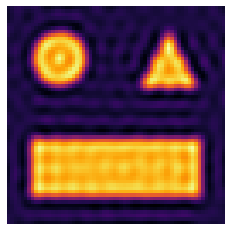

(-0.5, 63.5, 63.5, -0.5)

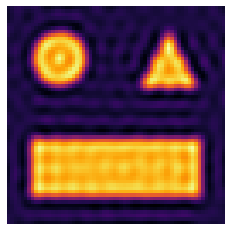

In [6]:
k = 500
b_vec = b.reshape((-1,1))
x_tsvd = TruncatedSVD_sol(A, k, b_vec)
Deblur.plot_rec(x_tsvd)
plt.imshow(x_tsvd.reshape((imagesize_x, imagesize_y)))
plt.axis('off')

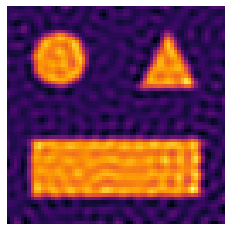

<Figure size 432x288 with 0 Axes>

In [19]:
from trips.solvers.CGLS import *
# b_vec = b.reshape((-1,1))
x_0 = np.zeros((imagesize_x*imagesize_y))#A.T@b_vec
x_0 = x_0.reshape((-1,1))
(x, x_history, k) = TP_cgls(A, b_vec, x_0, max_iter = 200, tol = 0.0001)
Deblur.plot_rec(x)

In [7]:
31815*2

63630

In [9]:
63630*4/6

42420.0